In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [73]:
df.columns


Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [74]:
df.shape

(8744, 41)

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

y = le.fit_transform(df['koi_disposition'])
y_mappings = {index: label for index, label in 
                  enumerate(le.classes_)}
y_mappings


{0: 'CANDIDATE', 1: 'CONFIRMED', 2: 'FALSE POSITIVE'}

C:\Users\gairo\Anaconda3\envs\ut_ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.12426381 0.17392375 0.13728723 0.05266042 0.01644462 0.01291621
 0.01800502 0.01237989 0.02737426 0.0232257  0.01513916 0.01275447
 0.00844793 0.01985203 0.02279944 0.02012089 0.02273557 0.01346164
 0.01075795 0.01205443 0.01117711 0.01138644 0.01150821 0.008527
 0.00795483 0.0083643  0.0448443  0.00835632 0.00955488 0.01629747
 0.01287908 0.00936401 0.0119037  0.01088885 0.00843748 0.01262573
 0.00835494 0.01062808 0.00931167 0.01103118]


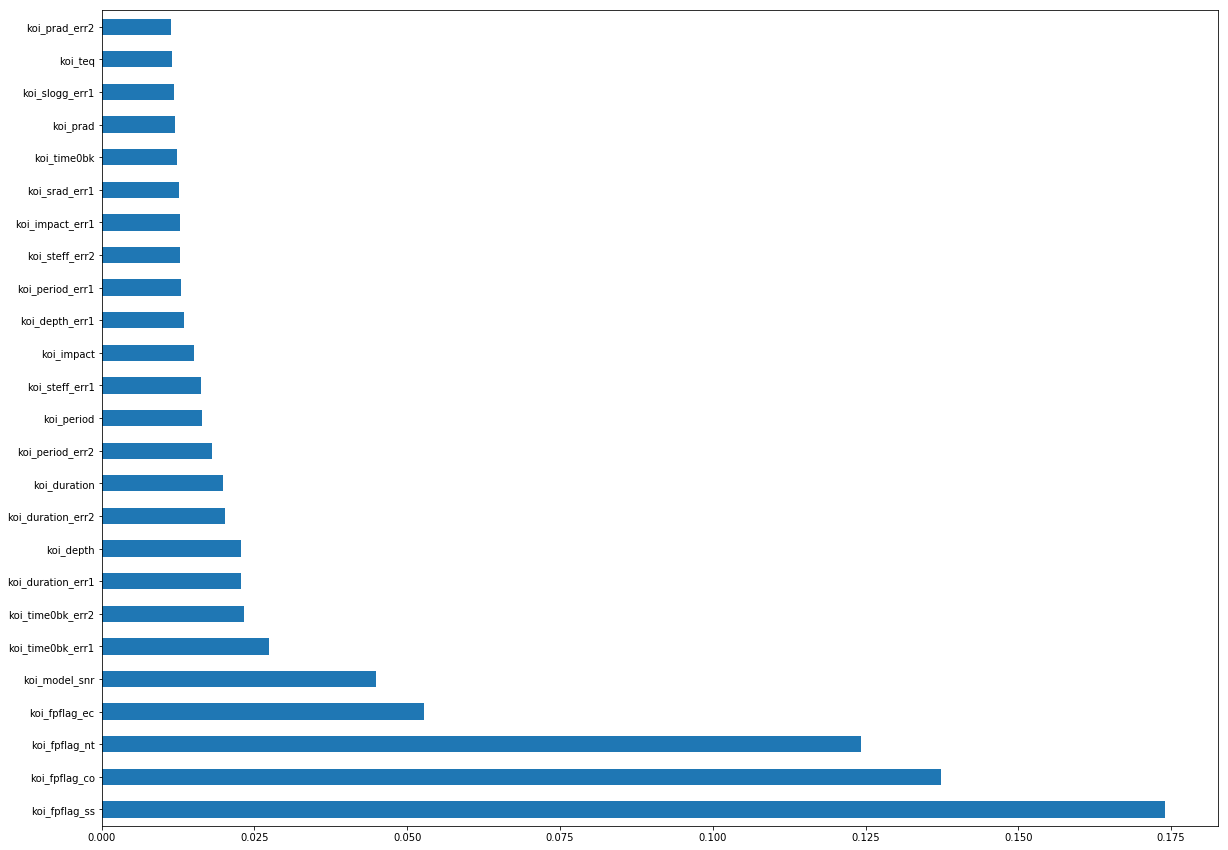

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X=df.iloc[:,1:]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(20,15))
plt.show()

In [78]:
# X=X[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_duration_err2','koi_model_snr','koi_time0bk_err1','koi_steff_err1','koi_duration_err1','koi_teq','koi_duration','koi_period','koi_time0bk_err2','koi_period_err1','koi_period_err2','koi_steff_err2','koi_depth_err2','koi_impact_err1','koi_prad','koi_time0bk','koi_depth_err1','koi_depth','koi_slogg_err1','koi_impact','koi_impact_err2','koi_insol_err2','ra','koi_srad_err1']].values
X=X[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec','koi_duration_err2',
     'koi_model_snr','koi_time0bk_err1','koi_steff_err2','koi_duration_err1',
     'koi_duration','koi_duration_err2','koi_period','koi_time0bk_err2','koi_period_err1',
     'koi_period_err2','koi_steff_err1','koi_prad','koi_impact','koi_depth_err1','koi_impact_err1',
     'koi_depth','koi_slogg_err1','koi_srad_err1','koi_time0bk','koi_prad_err2','koi_teq']].values
X.shape

(8744, 26)

In [79]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

model = SVC(kernel='linear',random_state=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)
score = accuracy_score(y_test,y_pred)
print(score)
#using Grid Search
parameters = [{'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9]}]
              
grid_search =GridSearchCV(estimator=model,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)


[[ 273  230    8]
 [  71  501   16]
 [   3    0 1084]]
0.8499542543458372


In [80]:
accuracy=grid_search.best_score_
accuracy

0.8865507776761208

In [81]:
accuracy
grid_search.best_params_

{'C': 1000, 'gamma': 0.9, 'kernel': 'rbf'}

In [82]:
model2 = SVC(kernel='rbf',C=1000,gamma=.9)
model2.fit(X_train,y_train)
y_pred= model2.predict(X_test)

In [83]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 354  149    8]
 [  85  491   12]
 [   4    3 1080]]


In [84]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8806038426349497


AttributeError: 'list' object has no attribute 'values'